_____ MODEL 0 _____
AVG GRADIENT NORM:  2.526392599739542
GRADIENT NORM STANDARD DEVIATION:  0.40771973746286655




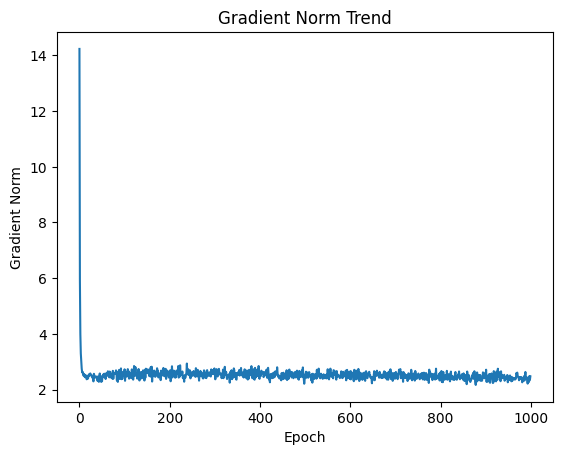

_____ MODEL 1 _____
AVG GRADIENT NORM:  4.067540827364371
GRADIENT NORM STANDARD DEVIATION:  0.3210284126511252




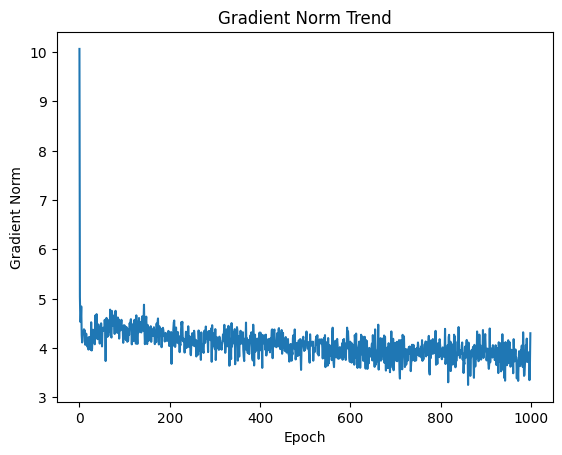

_____ MODEL 2 _____
AVG GRADIENT NORM:  9.54204166922318
GRADIENT NORM STANDARD DEVIATION:  2.225290283763605




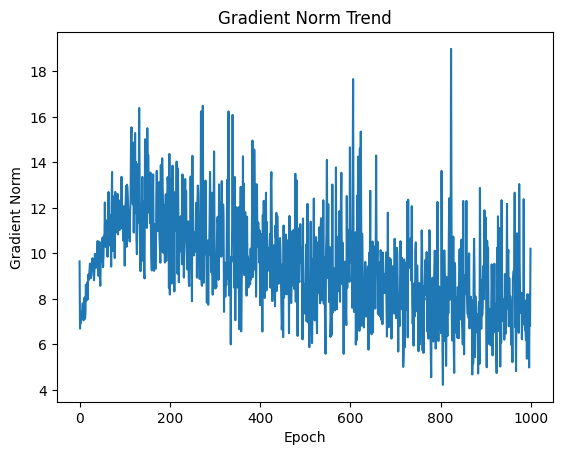

_____ MODEL 3 _____
AVG GRADIENT NORM:  10.179578529025708
GRADIENT NORM STANDARD DEVIATION:  3.3072766145042625




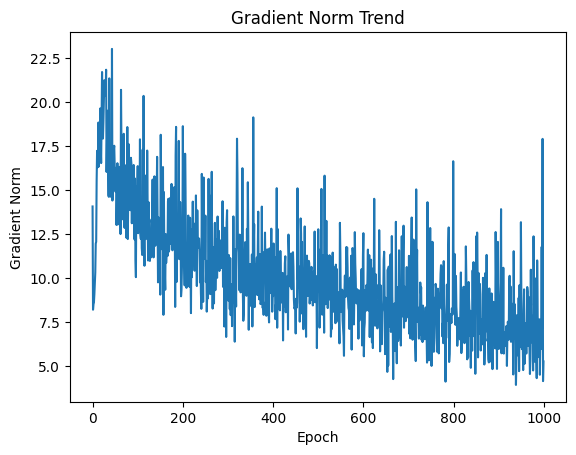

_____ MODEL 4 _____
AVG GRADIENT NORM:  9.817389251751937
GRADIENT NORM STANDARD DEVIATION:  4.075285861110034




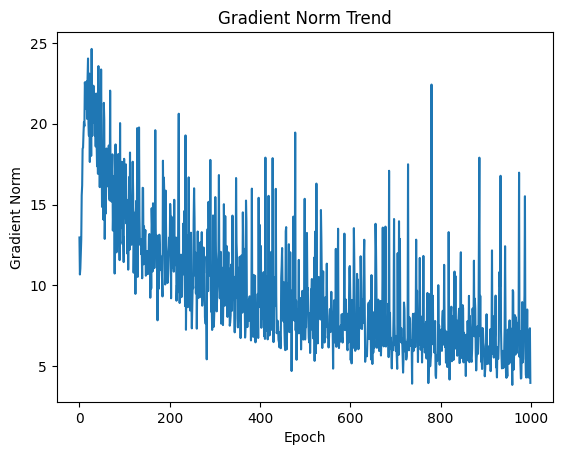

In [2]:

import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)
from gradient_diagnostics import gradient_norm, training_norm
from dynamic_architect import Neural_Network
from data.generate import generate_circle_data 
from layers import Linear 
from activations import ReLU , Sigmoid
from losses import BCE 
from train_loop import train 
import numpy as np


#bây giờ loop qua các depth, đo bằng training _norm, convergence_speeed -> in ra 
model0 = Neural_Network([2,16,1]) 
depth1 = model0.layers 
model1 = Neural_Network([2,16,16,1]) 
depth2 = model1.layers
model2 = Neural_Network([2,16,16,16,16,1]) 
depth4 = model2.layers
model3 = Neural_Network([2,16,16,16,16,16,16,1]) 
depth6 = model3.layers
model4 = Neural_Network([2,16,16,16,16,16,16,16,16,1]) 
depth8 = model4.layers
#depth1 đại diện cho baseline
models =  [depth1,depth2,depth4,depth6,depth8] 

X,y =  generate_circle_data(2000,0.5,42)
import matplotlib.pyplot as plt 

for i in range(len(models)):
    
    loss_func = BCE()
    epochs_norm = training_norm(models[i],loss_func,X,y,1000,32,0.001) #tính norm toàn mạng /1 epoch
    
    print("_____","MODEL",i,"_____") 
    print("AVG GRADIENT NORM: ", np.mean(epochs_norm))
    print("GRADIENT NORM STANDARD DEVIATION: ",np.std(epochs_norm))
    print("\n")

    plt.plot(epochs_norm)
    plt.xlabel("Epoch")
    plt.ylabel("Gradient Norm") 
    plt.title("Gradient Norm Trend")
    plt.show()


    
    
    